In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
from scipy.optimize import curve_fit
%matplotlib inline

rootTP="/home/johann/Remote/imac"
rootMAC="/Users/jh"
rootTEST="/home/johann"
root=rootTEST

In [17]:
def readSqDist(a,p,k,u,trigger,dt='0.0005',t='200'):
    data = []
    file = root+'/Documents/workspace-cpp/RanbSPS/relwithdebinfo/sim_data/'+trigger
    file += '/dt'+dt+'/t'+str(t)+'/a'+str(a)+'/p'+str(p)+'/k'+k+'/u'+str(u)+'/Coordinates/squareDistances.txt'
    
    with open(file, 'r') as f:
        for i, line in enumerate(f):
            lines = line.split()
            data.append(lines)
    return  (np.asarray(data)).astype(float)

## d=9 vary U_0

/usr/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


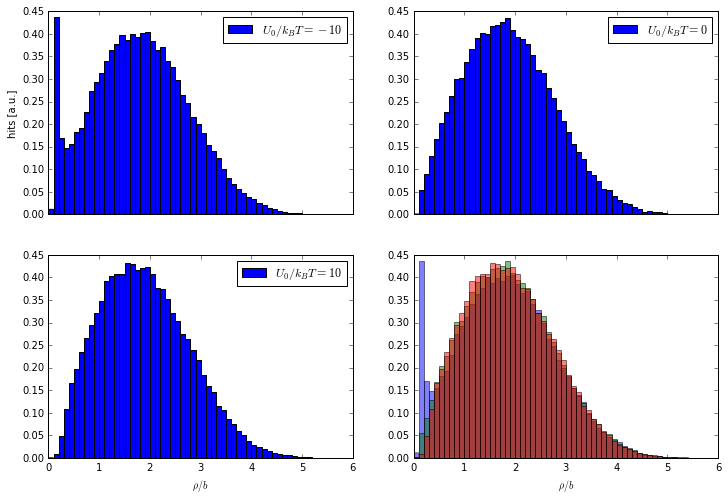

In [61]:
a=1; p=1; d=9; t=11; k='1.000';
trigger='rand/d'+str(d)+'/fixb'
us=[-10,0,10]
bins=np.arange(0,5.5,0.1)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
f.subplots_adjust(hspace=0)#make plots touch vertically
datas=[]
for u in us:
    data=readSqDist(a,p,k,u,trigger,t=t)
    distances=np.sqrt(data[:,1:].flatten())
    datas.append(distances/10.)
ax1.hist(datas[0],bins=bins,label='$U_0/k_BT=-10$',normed=1)
ax2.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',normed=1)
ax3.hist(datas[2],bins=bins,label='$U_0/k_BT=10$',normed=1)
ax4.hist(datas[0],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[2],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax3.set_xlabel(r'$\rho/b$')
ax4.set_xlabel(r'$\rho/b$')
ax1.set_ylabel('hits [a.u.]')
ax1.legend()
ax2.legend()
ax3.legend()
f.show()

### Conclusion
For the attractive case with a sd $\check{d}$, the particle has a tendency to remain very close to at least one rod. The difference between the neutral and the repulsive case is not so pronounced, but there is a slightly smaller probability for small $\rho<0.4$. At larger distances, the differences between all three cases become negligible. The density of neighboring rods in the unit cell is maximal for a distance of about $2b$.

## d = 3 vary U_0

/usr/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


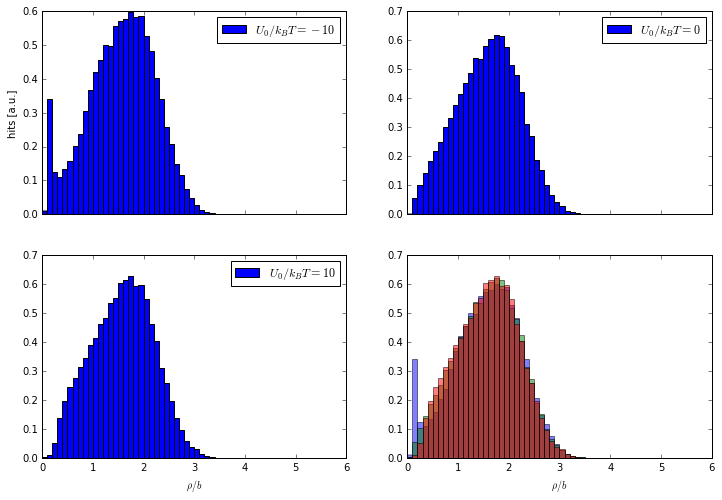

In [64]:
a=1; p=1; d=3; t=11; k='1.000';
trigger='rand/d'+str(d)+'/fixb'
us=[-10,0,10]
bins=np.arange(0,5.5,0.1)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
f.subplots_adjust(hspace=0)#make plots touch vertically
datas=[]
for u in us:
    data=readSqDist(a,p,k,u,trigger,t=t)
    distances=np.sqrt(data[:,1:].flatten())
    datas.append(distances/10.)
ax1.hist(datas[0],bins=bins,label='$U_0/k_BT=-10$',normed=1)
ax2.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',normed=1)
ax3.hist(datas[2],bins=bins,label='$U_0/k_BT=10$',normed=1)
ax4.hist(datas[0],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[2],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax3.set_xlabel(r'$\rho/b$')
ax4.set_xlabel(r'$\rho/b$')
ax1.set_ylabel('hits [a.u.]')
ax1.legend()
ax2.legend()
ax3.legend()
f.show()

### Conclusion:
The distribution goes to zero at a smaller $\rho\approx 3.5b$, in contrast to the $\check{d}=0.9b$ case, where the distribution goes to zero at  $\rho\approx 5b$. The distance between one corner of the central cell and opposite corner of the simulation box is $\sqrt{2} 2 b = 2.8 b$. 

We again see a clear increase in probability to be very close to a rod for the attractive case, but the maximum of about $0.34$  is less pronounced compared to the $\check{d}=0.9b$ case, where is has a magnitude of about $0.44$. This indicates that for $\check{d}=0.3b$ the tracer is only close to a maximum of one rod at a time, whereas for $\check{d}=0.9b$ the tracer is often close to more than one rod. 

\textit{NOTE:} I could analyze this further, by checking how many $\rho<2*(a+p)$ during the simulation.

## d=0 vary U_0

/usr/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


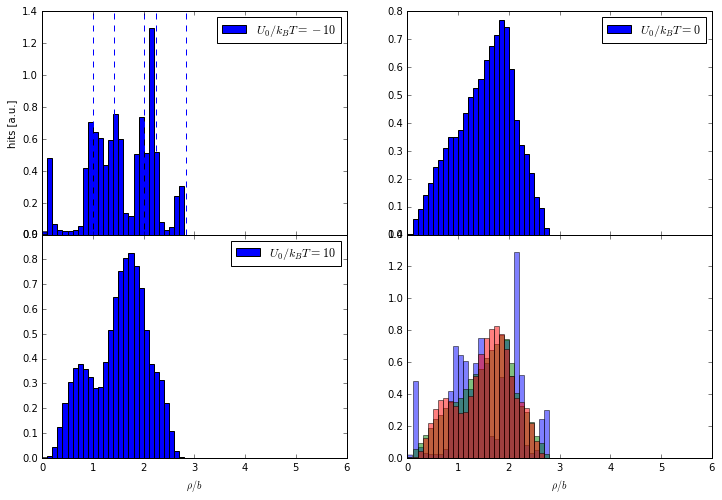

In [74]:
a=1; p=1; d=0; t=11; k='1.000';
trigger='rand/d'+str(d)+'/fixb'
us=[-10,0,10]
bins=np.arange(0,5.5,0.1)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,  figsize=(12, 8), sharex=True)
f.subplots_adjust(hspace=0)#make plots touch vertically
datas=[]
for u in us:
    data=readSqDist(a,p,k,u,trigger,t=t)
    distances=np.sqrt(data[:,1:].flatten())
    datas.append(distances/10.)
ax1.hist(datas[0],bins=bins,label='$U_0/k_BT=-10$',normed=1)
ax1.axvline(x=1,ls='dashed'); ax1.axvline(x=np.sqrt(2),ls='dashed'); ax1.axvline(x=np.sqrt(5),ls='dashed');
ax1.axvline(x=2,ls='dashed'); ax1.axvline(x=np.sqrt(2)*2,ls='dashed');
ax2.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',normed=1)
ax3.hist(datas[2],bins=bins,label='$U_0/k_BT=10$',normed=1)
ax4.hist(datas[0],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[1],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax4.hist(datas[2],bins=bins,label='$U_0/k_BT=0$',alpha=0.5,normed=1)
ax3.set_xlabel(r'$\rho/b$')
ax4.set_xlabel(r'$\rho/b$')
ax1.set_ylabel('hits [a.u.]')
ax1.legend()
ax2.legend()
ax3.legend()
f.show()

### Conclusion:
In the attractive case the tracer has a tendency to stay very close to one rod, hence, one sees maxima at the radial distances between two rods in the symmetric system, i.e. $\rho = b, \sqrt{2} b, 2b, \sqrt{5}b, \sqrt{2}\cdot 2 b$. These distances are inidcated with dashed vertical lines.

In the repulsive case the tracer tends to be in the center of the cell, hence one sees a maximum at $\rho=\sqrt{2}\cdot0.5b$ and at $\rho=\sqrt{2}\cdot1.5b$.

In the neutral case the tracer can travel anywhere in the central cell.

## TODO:
- I could normalize the histograms for $U_0\neq0$ by dividing them by the histogram data for $U_0=0$. *Done*: Not that interesting (see below)
- I could analyze the attractive case data further, by checking how many $\rho<2*(a+p)$ during the simulation, to gauge whether the particle has a tendency to be close to two or more rods.

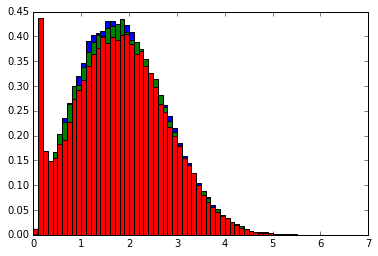

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide


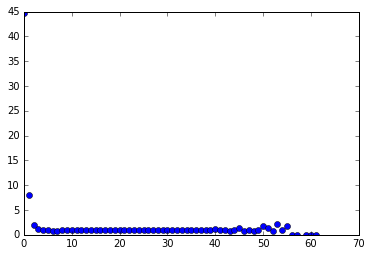

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in true_divide


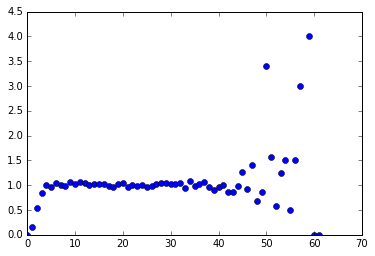

In [85]:
a=1; p=1; d=9; t=11; k='1.000'; u=10;
trigger='rand/d'+str(d)+'/fixb'
data=readSqDist(a,p,k,u,trigger,t=t)
distances=np.sqrt(data[:,1:].flatten())
bins=np.arange(0,7,0.1)
countsu10,bins,bars=plt.hist(distances/10.,bins=bins,label='$U_0/k_BT=0$',normed=True)
u=0;
data=readSqDist(a,p,k,u,trigger,t=t)
distances=np.sqrt(data[:,1:].flatten())
bins=np.arange(0,7,0.1)
countsu0,bins,bars=plt.hist(distances/10.,bins=bins,label='$U_0/k_BT=0$',normed=True)
u=-10;
data=readSqDist(a,p,k,u,trigger,t=t)
distances=np.sqrt(data[:,1:].flatten())
bins=np.arange(0,7,0.1)
countsum10,bins,bars=plt.hist(distances/10.,bins=bins,label='$U_0/k_BT=0$',normed=True)
plt.show()
plt.plot(countsum10/countsu0,'o')
plt.show()
plt.plot(countsu10/countsu0,'o')
plt.show()